`Problem Statement:`
The objective is to predict the price of real estate properties in california based on various features such as location, size, number of rooms, etc.

`Dataset Description:`
This dataset includes various features that influence real estate prices. Key columns may include:

`housing_median_age:` the median age of the house

`total_rooms:` total number of rooms in the house

`total_bedrooms:` total number of bedrooms in the house

`median_house_value:` median value of the house (target variable)

`Latitude and Longitude:` Geographical coordinates of the property


`Prediction Goal:`
The goal is to develop a predictive model that can: Predict the median house price per in california.

`Dataset:` https://www.kaggle.com/datasets/mohamedyaman/california-housing-prices

#Code Section

`Basic data cleaning`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as sm
from google.colab import drive
drive.mount('/content/drive')
initial_df = pd.read_csv('/content/drive/MyDrive/Data Analytics/Projects/housing.csv')
initial_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
# 1. Display basic information about the dataset
initial_df.info()
print()
print("======================================================================================")
# 2. Check for missing values
print(initial_df.isnull().sum())
print()
print("======================================================================================")
# 3. Check for shape of the dataset
print(f"Initial Shape before data cleaning: {initial_df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity 

In [ ]:
# 4. Address missing values (example: fill with mean/mode or drop)
initial_df['total_bedrooms'] = initial_df['total_bedrooms'].fillna(initial_df['total_bedrooms'].median())

# 5. Check for duplicates
initial_df = initial_df.drop_duplicates()

# Check for missing values after handling duplicates
print(initial_df.isnull().sum())
print()
print("======================================================================================")

# Check for shape of the dataset
print(f"Shape after data cleaning: {initial_df.shape}")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Shape after data cleaning: (20640, 10)


In [ ]:
# 6. rename 'median_house_value' as the target variable and move it to be the last column

# Move 'median_house_value' to the last column
target_column = initial_df.pop('median_house_value')
initial_df['median_house_value'] = target_column

# Rename 'median_house_value' to 'target'
initial_df = initial_df.rename(columns={'median_house_value': 'target'})

# Display the updated DataFrame
initial_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_proximity    target  
0           322.0       126.0         8.3252        NEAR BAY  452600.0  
1          2401.0      1138.0         8.3014        NEAR BAY  358500.0  
2           496.0       177.0         7.2574        NEAR BAY  352100.0  
3           558.0       219.0         5.6431        NEAR BAY  341300.0  
4           565.0       259.0         3.8462        NEAR BAY  342200.0  
...           ...         ...            ...             ...       ...  
20635       845.0       330.0         1.5603          INLAND   78100.0  
20636       356.0       114.0         2.5568          INLAND   77100.0  
20637      1007.0       433.0         1.7000          INLAND   92300.0  
20638       741.0       349.0         1.8672          INLAND   84700.0  
20639      1387.0       530.0         2.3886          INLAND   89400.0  

[20640 rows x 10 columns]

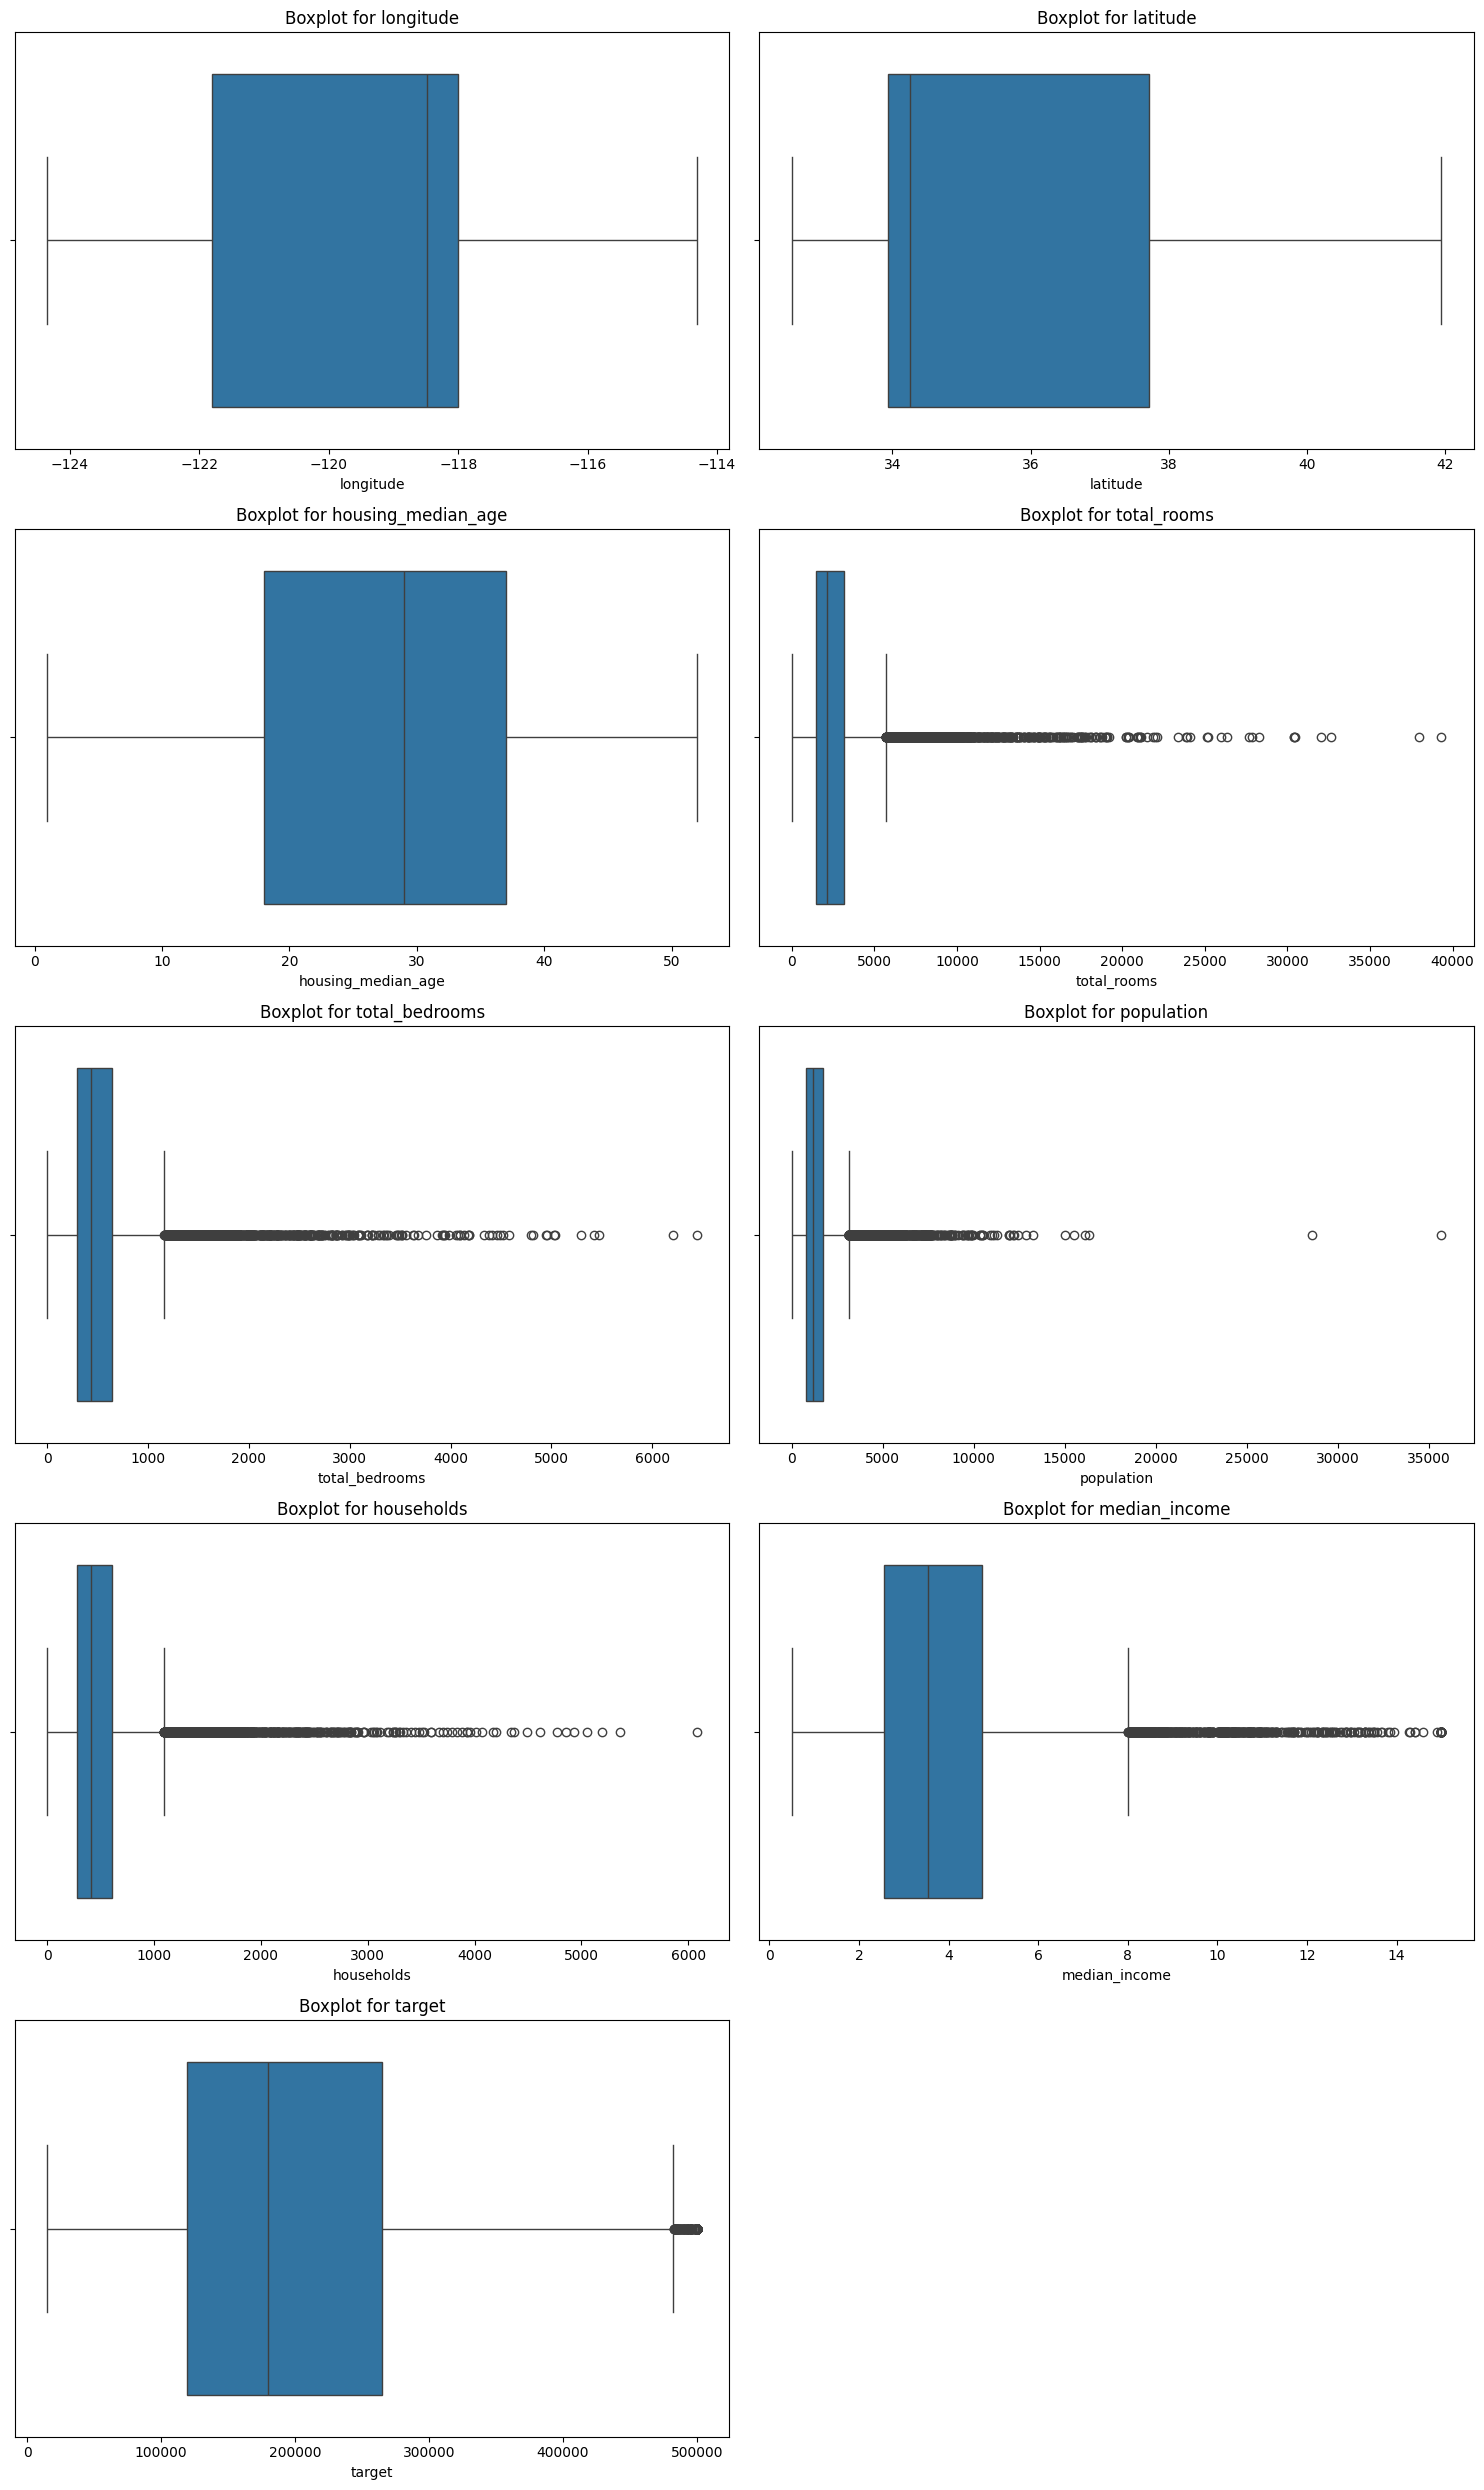

In [ ]:
# 7. Use boxplots to identify outliers for numeric variables and remove them
numeric_cols = initial_df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=initial_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Hide any unused subplots
for i in range(num_cols, num_rows * 2):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# 8. Remove outliers

# Identify outliers using IQR for numeric variables
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in numeric_cols:
    initial_df = remove_outliers_iqr(initial_df, col)
print(f"Shape after removing outliers: {initial_df.shape}")

Shape after removing outliers: (16896, 10)


In [ ]:
# 9. get dummies for categorical features

# Create dummy variables for the 'ocean_proximity' column
initial_df = pd.get_dummies(initial_df, columns=['ocean_proximity'], drop_first=True)
initial_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income    target  \
2           496.0       177.0         7.2574  352100.0   
3           558.0       219.0         5.6431  341300.0   
4           565.0       259.0         3.8462  342200.0   
5           413.0       193.0         4.0368  269700.0   
6          1094.0       514.0         3.6591  299200.0   
...           ...         ...            ...       ...   
20635       845.0       330.0         1.5603   78100.0   
20636       356.0       114.0         2.5568   77100.0   
20637      1007.0       433.0         1.7000   92300.0   
20638       741.0       349.0         1.8672   84700.0   
20639      1387.0       530.0         2.3886   89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
2                       False                   False   
3                       False                   False   
4                       False                   False   
5                       False                   False   
6                       False                   False   
...                       ...                     ...   
20635                    True                   False   
20636                    True                   False   
20637                    True                   False   
20638                    True                   False   
20639                    True                   False   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
2                          True                       False  
3                          True                       False  
4                          True                       False  
5                          True                       False  
6                          True                       False  
...                         ...                         ...  
20635                     False                       False  
20636                     False                       False  
20637                     False                       False  
20638                     False                       False  
20639                     False                       False  

[16896 rows x 13 columns]

`Feature Engineering`

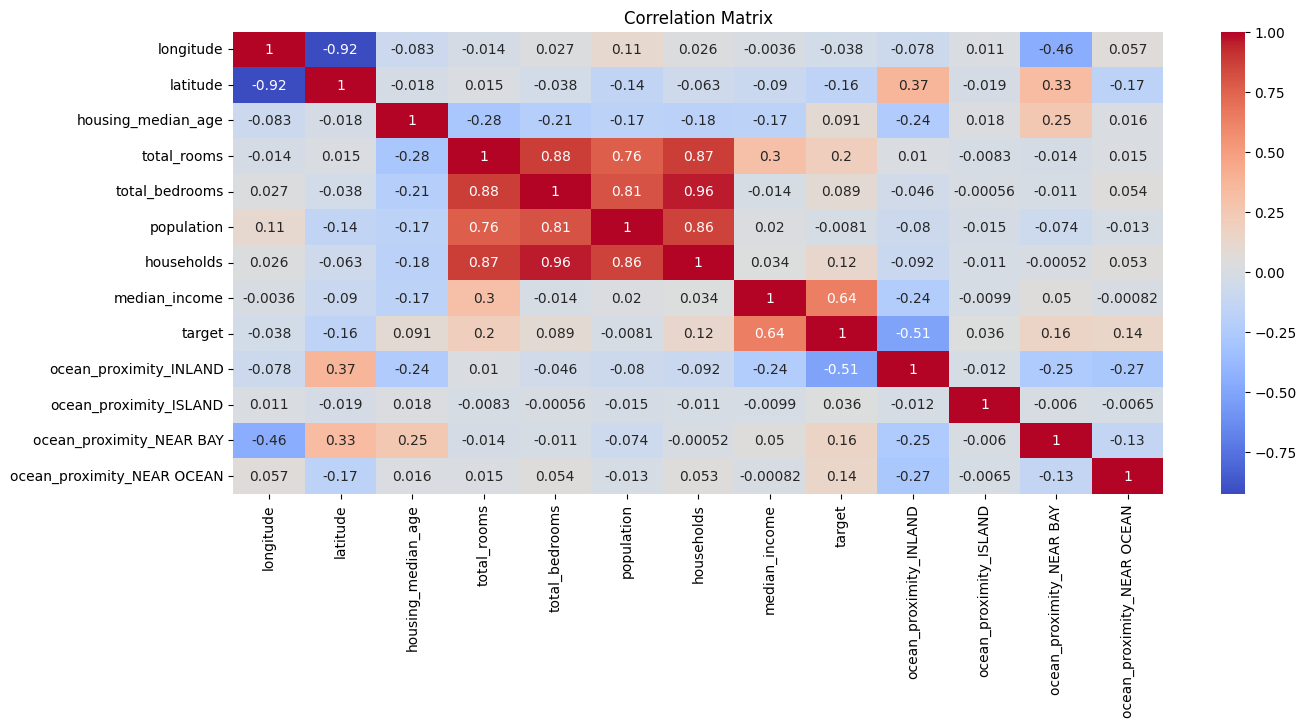

In [ ]:
# 1. Correlation Analysis
correlation_matrix = initial_df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

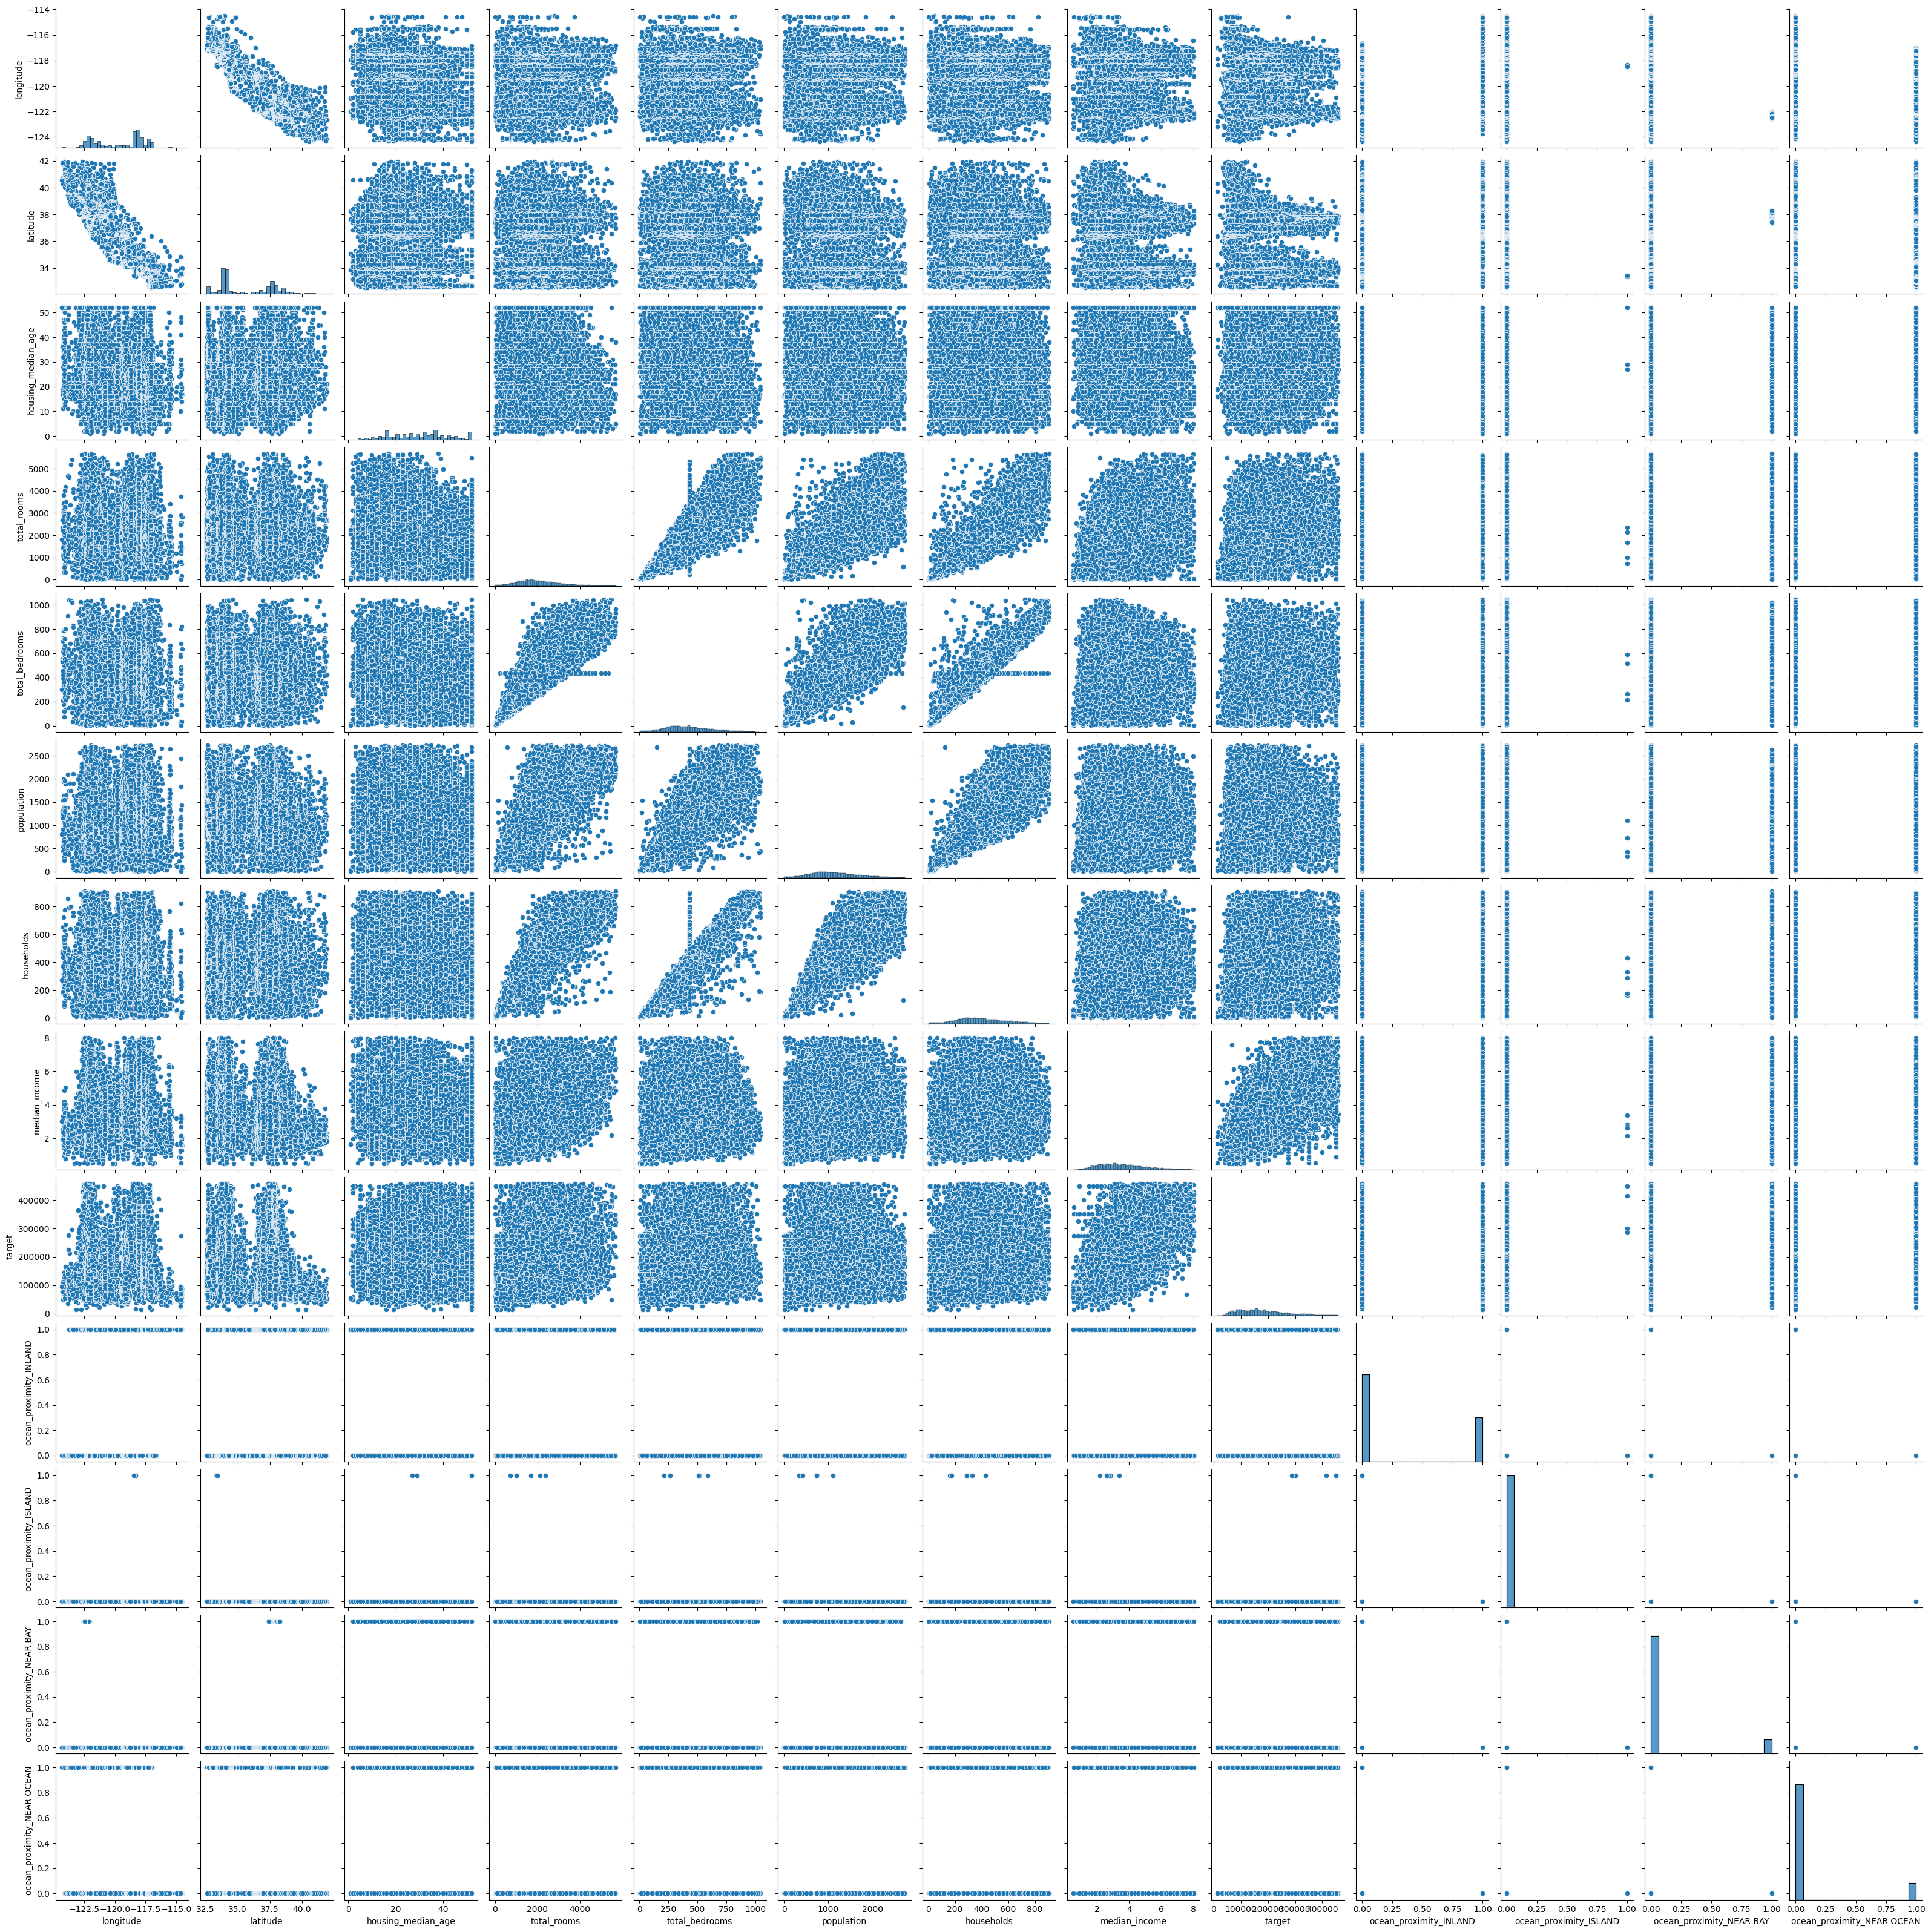

In [ ]:
# 2. Scatter Plot Matrix
sns.pairplot(initial_df)
plt.show()

`Predictive Model`

In [ ]:
# 3. Split data into features (X) and target (y)
X = initial_df.drop('target', axis=1)
y = initial_df['target']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Gradient Boosting Regression with Grid Search

# 5. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# 6. Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=1)

# 7. Perform Grid Search
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# 8. Get the best model and its hyperparameters
best_gb_regressor = grid_search.best_estimator_

# 9. Evaluate the model
y_pred = best_gb_regressor.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


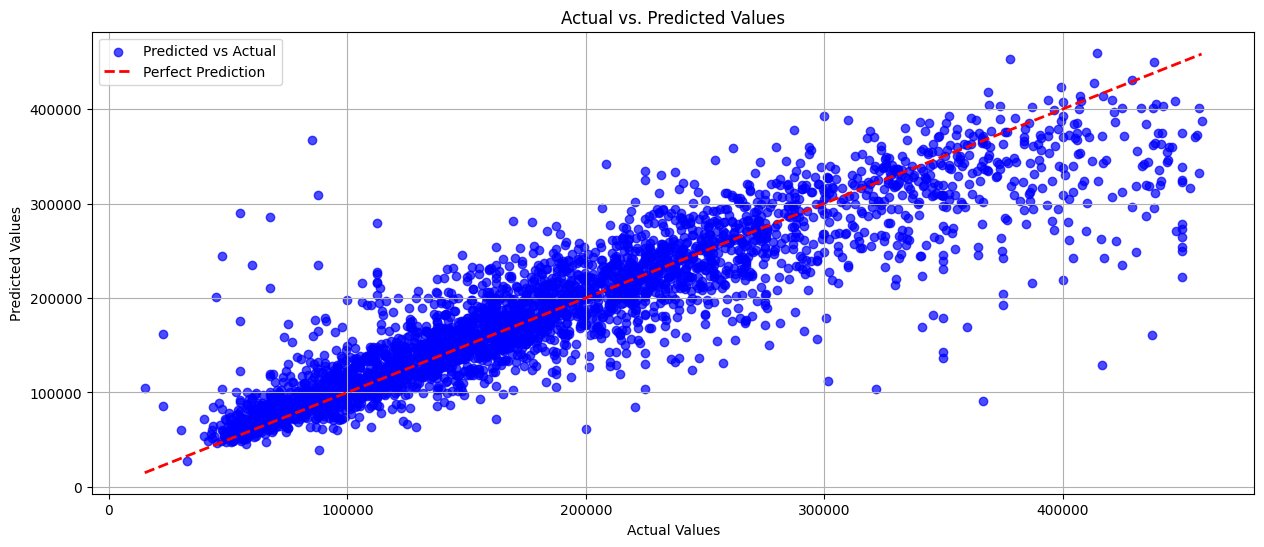

In [ ]:
# Actual vs Predicted Scatter Plot

# 10. Create the scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted vs Actual', alpha=0.7)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label="Perfect Prediction")

# Add legend
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation Metrics for Model Performance
# 11. Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1630481200.2270832
Root Mean Squared Error: 40379.21742960211
Mean Absolute Error: 26503.48021095738
R-squared: 0.811398113350966
